In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Data_Holland/mwl1558_C2.csv')
data.head()

,Pmin,Pmax,Pavg,Pref,Pcmin,Pcavg,Pcmax,Amin,Aavg,Amax,Ramin,Ramax,Ravg,Rain
0,-49,-49,-49.0,-49.00,-49.00,-49.00,-49.00,0.0,0.0,0.0,3.00,3.00,3.00,0
1,-49,-48,-48.5,-48.75,-48.75,-48.75,-48.75,0.0,0.0,0.0,2.75,2.75,2.75,0
2,-49,-48,-48.5,-48.50,-48.50,-48.50,-48.50,0.0,0.0,0.0,2.50,2.50,2.50,0
3,-49,-48,-48.5,-48.50,-48.50,-48.50,-48.50,0.0,0.0,0.0,2.50,2.50,2.50,0
4,-49,-48,-48.5,-48.50,-48.50,-48.50,-48.50,0.0,0.0,0.0,2.50,2.50,2.50,0


In [3]:
apts=np.array(data['Pmin'])
bpts=np.array(data['Pavg'])
cpts=np.array(data['Pmax'])
xpts=np.array(data['Ramin'])
ypts=np.array(data['Ravg'])
zpts=np.array(data['Ramax'])
#X=np.vstack((xpts,ypts,zpts,apts,bpts,cpts))

#for raw average attenaution as explanatory
X=np.array(data['Ravg'])
X=X.reshape(1, -1)

y=np.array(data['Rain'])
X=X.T
X.shape

(9012, 1)

In [4]:
num_one_targets = int(np.sum(y))
zero_targets_counter = 0
indices_to_remove = []
for i in range(y.shape[0]):
    if y[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)
            
X = np.delete(X, indices_to_remove, axis = 0)
y = np.delete(y, indices_to_remove, axis = 0)
X.shape

(1734, 1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_train = classifier.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[683  18]
 [ 86 600]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       701
           1       0.97      0.87      0.92       686

   micro avg       0.93      0.93      0.93      1387
   macro avg       0.93      0.92      0.92      1387
weighted avg       0.93      0.93      0.92      1387



In [19]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[159   7]
 [ 21 160]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       166
           1       0.96      0.88      0.92       181

   micro avg       0.92      0.92      0.92       347
   macro avg       0.92      0.92      0.92       347
weighted avg       0.92      0.92      0.92       347



In [11]:
def confusion_matrix(data,actual_values,model):
    pred_values=model.predict(data)
    bins=np.array([0,0.5,1])
    cm=np.histogram2d(actual_values,pred_values, bins=bins)[0]
    accuracy=(cm[0,0]+cm[1,1])/cm.sum()
    return cm,accuracy

In [12]:
cm=confusion_matrix(X_test,y_test,classifier)
cm

(array([[159.,   7.],
        [ 22., 159.]]), 0.9164265129682997)

In [13]:
error = []
# Calculating error for K values between 1 and 50
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

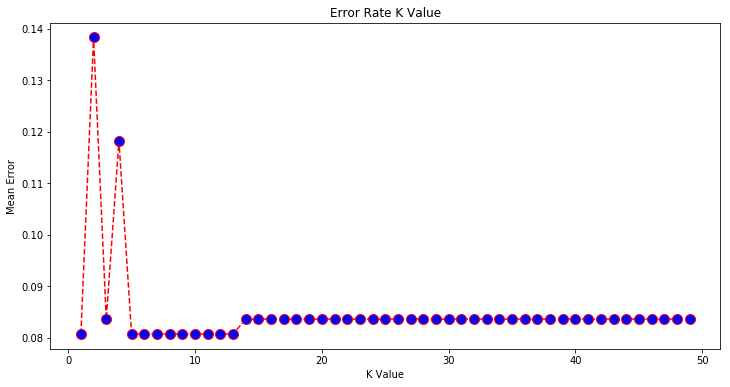

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.savefig('error2.eps')

In [1898]:
from sklearn.metrics import log_loss  
# where y_pred are probabilities and y_true are binary class labels
log_loss(y_test, classifier.predict_proba(X_test), eps=1e-15)

1.4889327790333848

In [1899]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.9379988028731044


In [1900]:
y_prob=knn.predict_proba(X_test)

In [1901]:
y_prob.shape

(347, 2)

In [1127]:
X_train1687=X_train
X_test1687=X_test
y_train1687=y_train
y_test1687=y_test